# 5NN CODE

#### Aim: For every galaxy in the catalog, find its 5th nearest projected neighbor within some velocity/redshift range of that galaxy.

#### Notes
- kNN --> average projected density from kth nearest neighbor (number galaxies per Mpc^2)

- redshift slice for each galaxy can be physically motivated at the outset!

- what is biggest velocity dispersion we could expect? Coma velocity dispersion ~1100 km/s. use ~2000 km/s for 2-sigma?

- ACTUALLY. for now, +/- 500 km/s.

5NN projected distance is a biased indicator based on density. Clusters very dense, but if we reduce redshift slice too much we remove nearby galaxies with massive velocity dispersions. In less dense environments, a small redshift would be helpful - too large and we include galaxies that are not, in fact, nearby.

#### 5 Nearest Neighbor Density Equation:

$\Sigma_{5\text{NN}} = \frac{5}{\pi r_5^2}$

- units: Mpc$^{-2}$

- $r_5$ = distance to 5th nearest neighbor

#### Summarizing the order of kNN operations:

- For some galaxy with redshift, RA, DEC, 
    - isolate_galaxy_region(cat, redshift, RA, DEC)
        - will take cat and apply the redshift and RA-DEC flags (IF the RA-DEC flags exist)
        - galaxies within +/- 500 km/s
        - outputs sliced_cat
    - calc_projected_distance(main_RA, main_DEC, sliced_catalog)
        - central galaxy's RA, DEC == main_RA, main_DEC
        - sliced_cat is taken from isolate_galaxy_region()
        - output is a list of projected distances from central galaxy to every galaxy in sliced_catalog
    - calc_kNN(projected_distances, redshift)
        - finds kth nearest neighbor in the projected distances list and calculates the kNN density 
        - if len(list) < k after removing the central galaxy projected distance (which is 0), set kNN density to NaN
        - uses redshift to convert r_k from degrees back to Mpc -- assumes distance to kNN galaxy is same as distance to central galaxy (not a problem since we are only concerned with PROJECTED distances)

### Running k=5, k=3

In [605]:
%run kNN_local_density.py -vr_limit 500 -k 3

-vr_limit [int in km/s; default is 500] -radius_limit [int in Mpc; default is 100 (no radius bounds)] -k [int; default is 5 (for fifth nearest neighbor]
Using vr_limit = 500 km/s
Using radius_limit = 100 Mpc --> no limit!
Using k = 3
Number of Galaxies without kNN: 0
Execution Time: 6.4 minute(s)


In [773]:
%run kNN_local_density.py -vr_limit 500 -k 5

-vr_limit [int in km/s; default is 500] -radius_limit [int in Mpc; default is 100 (no radius bounds)] -k [int; default is 5 (for fifth nearest neighbor]
Using vr_limit = 500 km/s
Using radius_limit = 100 Mpc --> no limit!
Using k = 5
Number of Galaxies without kNN: 0
Execution Time: 6.5 minute(s)


<Figure size 640x480 with 0 Axes>

In [604]:
#plot_kNN(k,ra,dec,all_kNN)

### Creating k=5 redshift and 2D projected surface density slices

In [774]:
all_RA = cat['RA']
all_DEC = cat['DEC']

In [775]:
lowz=np.min(cat['Z'])
highz=np.max(cat['Z'])
sorted_z = np.sort(cat['Z'])
first_33percent_index = int(0.33*len(cat))
third_66percent_index = int(0.66*len(cat))
bin1bound = cat['Z'][first_33percent_index]
bin2bound = cat['Z'][third_66percent_index]

#first bin is lowz to bin1bound
#second bin is bin1bound to bin2bound
#third bin is bin2bound to highz

bin1flag = (cat['Z']>lowz) & (cat['Z']<bin1bound)
bin2flag = (cat['Z']>bin1bound) & (cat['Z']<bin2bound)
bin3flag = (cat['Z']>bin2bound) & (cat['Z']<highz)

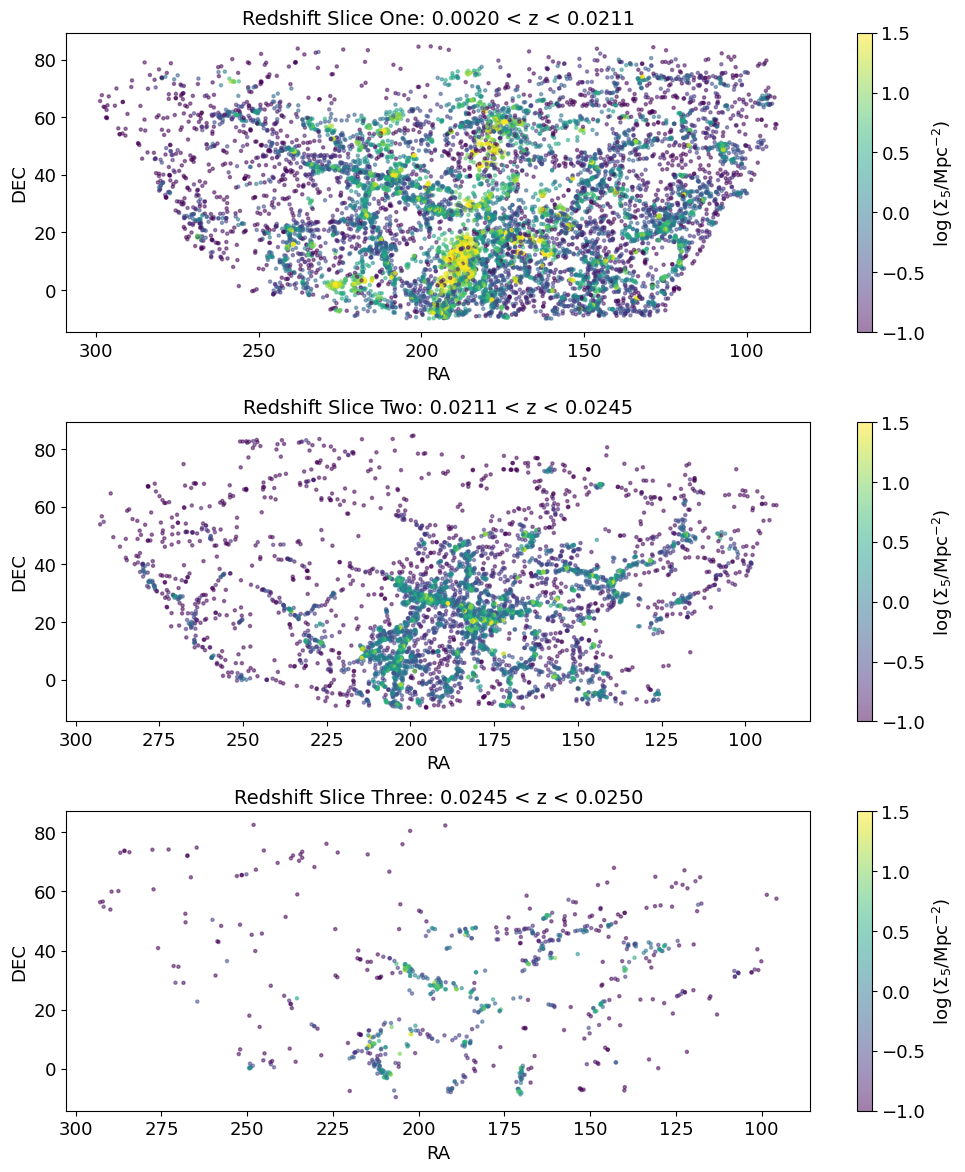

In [776]:
#define "good" flag, which filters out all instances where galaxies did not have a kNN
#given our isolation constraints
good_flag = (all_kNN!=-999)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(3,1,1)
plt.subplots_adjust(hspace=0.3)

im = ax.scatter(all_RA[good_flag & bin1flag], all_DEC[good_flag & bin1flag],
                c=np.log10(all_kNN[good_flag & bin1flag]), cmap='viridis', alpha=0.5, s=5, vmin=-1, vmax=1.5)
ax.invert_xaxis()
ax.set_xlabel('RA',fontsize=13)
ax.set_ylabel('DEC',fontsize=13)
ax.set_title(f'Redshift Slice One: {lowz:.4f} < z < {bin1bound:.4f}',fontsize=14)

ax.tick_params(labelsize=13)

cb = fig.colorbar(im)
cb.ax.tick_params(labelsize=13)
cb.set_label(fr'$\log$($\Sigma_{k}$/'+r'Mpc$^{-2}$)',fontsize=13)

ax2 = fig.add_subplot(3,1,2)

im2 = ax2.scatter(all_RA[good_flag & bin2flag], all_DEC[good_flag & bin2flag],
                c=np.log10(all_kNN[good_flag & bin2flag]), cmap='viridis', alpha=0.5, s=5, vmin=-1, vmax=1.5)
ax2.invert_xaxis()
ax2.set_xlabel('RA',fontsize=13)
ax2.set_ylabel('DEC',fontsize=13)
ax2.set_title(f'Redshift Slice Two: {bin1bound:.4f} < z < {bin2bound:.4f}',fontsize=14)

ax2.tick_params(labelsize=13)

cb2 = fig.colorbar(im2)
cb2.ax.tick_params(labelsize=13)
cb2.set_label(fr'$\log$($\Sigma_{k}$/'+r'Mpc$^{-2}$)',fontsize=13)


ax3 = fig.add_subplot(3,1,3)

im3 = ax3.scatter(all_RA[good_flag & bin3flag], all_DEC[good_flag & bin3flag],
                c=np.log10(all_kNN[good_flag & bin3flag]), cmap='viridis', alpha=0.5, s=5, vmin=-1, vmax=1.5)
ax3.invert_xaxis()
ax3.set_xlabel('RA',fontsize=13)
ax3.set_ylabel('DEC',fontsize=13)
ax3.set_title(f'Redshift Slice Three: {bin2bound:.4f} < z < {highz:.4f}',fontsize=14)

ax3.tick_params(labelsize=13)

cb3 = fig.colorbar(im3)
cb3.ax.tick_params(labelsize=13)
cb3.set_label(fr'$\log$($\Sigma_{k}$/'+r'Mpc$^{-2}$)',fontsize=13)

plt.show()

In [777]:
low5NN=np.log10(np.min(all_kNN))
high5NN=np.log10(np.max(all_kNN))
sorted_kNN = np.sort(all_kNN)
first_33percent_index = int(0.33*len(cat))
third_66percent_index = int(0.66*len(cat))
bin1bound = np.log10(sorted_kNN[first_33percent_index])
bin2bound = np.log10(sorted_kNN[third_66percent_index])

#first bin is lowz to bin1bound
#second bin is bin1bound to bin2bound
#third bin is bin2bound to highz

bin1flag = (np.log10(all_kNN)>low5NN) & (np.log10(all_kNN)<bin1bound)
bin2flag = (np.log10(all_kNN)>bin1bound) & (np.log10(all_kNN)<bin2bound)
bin3flag = (np.log10(all_kNN)>bin2bound) & (np.log10(all_kNN)<high5NN)

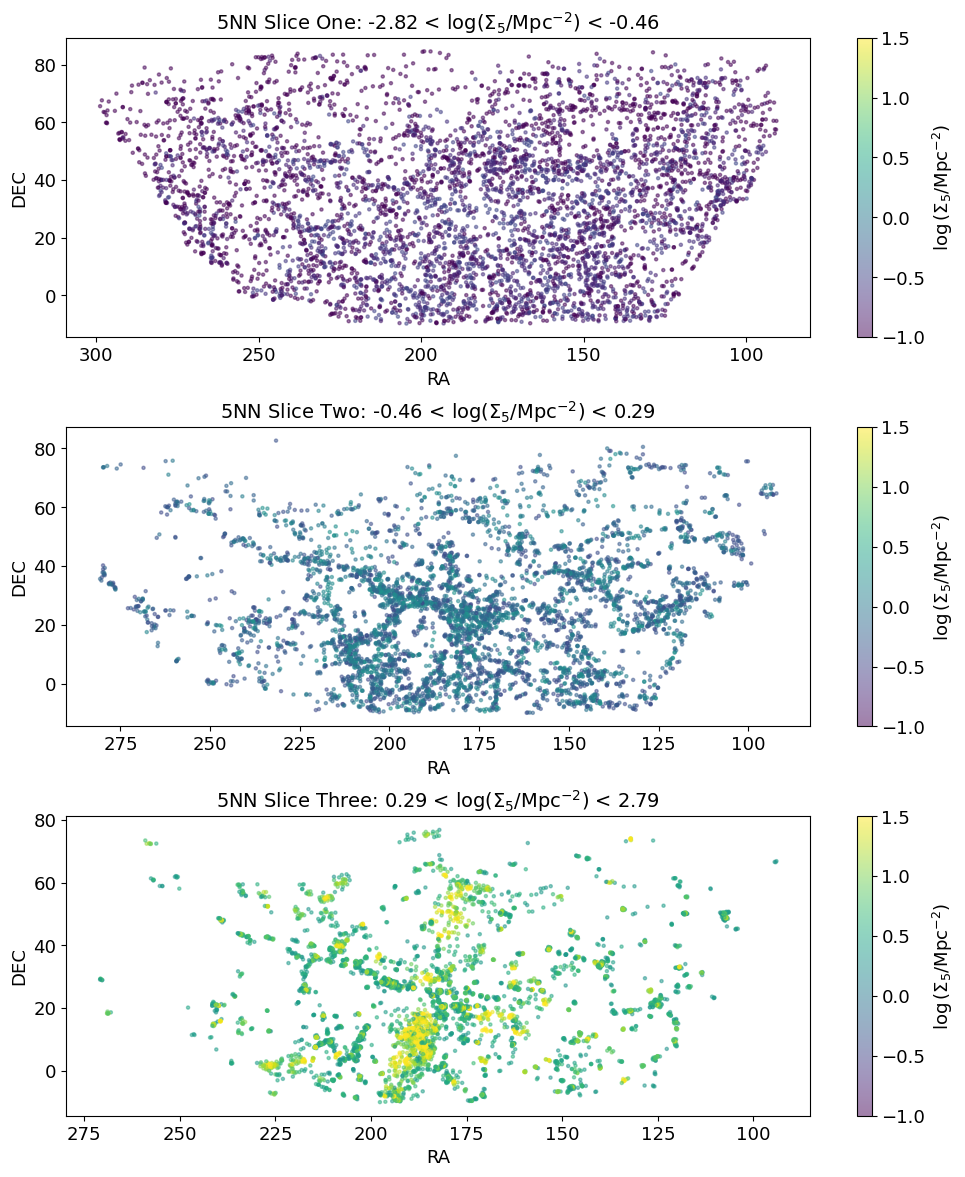

In [778]:
#define "good" flag, which filters out all instances where galaxies did not have a kNN
#given our isolation constraints
good_flag = (all_kNN!=-999)

fig = plt.figure(figsize=(12,14))
ax = fig.add_subplot(3,1,1)
plt.subplots_adjust(hspace=0.3)

im = ax.scatter(all_RA[good_flag & bin1flag], all_DEC[good_flag & bin1flag],
                c=np.log10(all_kNN[good_flag & bin1flag]), cmap='viridis', alpha=0.5, s=5, vmin=-1, vmax=1.5)
ax.invert_xaxis()
ax.set_xlabel('RA',fontsize=13)
ax.set_ylabel('DEC',fontsize=13)
ax.set_title(fr'5NN Slice One: {low5NN:.2f} < ' + r'log$(\Sigma_5$/Mpc$^{-2}$) < '+ \
              f'{bin1bound:.2f}', fontsize=14)

ax.tick_params(labelsize=13)

cb = fig.colorbar(im)
cb.ax.tick_params(labelsize=13)
cb.set_label(fr'$\log$($\Sigma_{k}$/'+r'Mpc$^{-2}$)',fontsize=13)

ax2 = fig.add_subplot(3,1,2)

im2 = ax2.scatter(all_RA[good_flag & bin2flag], all_DEC[good_flag & bin2flag],
                c=np.log10(all_kNN[good_flag & bin2flag]), cmap='viridis', alpha=0.5, s=5, vmin=-1, vmax=1.5)
ax2.invert_xaxis()
ax2.set_xlabel('RA',fontsize=13)
ax2.set_ylabel('DEC',fontsize=13)
ax2.set_title(fr'5NN Slice Two: {bin1bound:.2f} < ' + r'log$(\Sigma_5$/Mpc$^{-2}$) < '+ \
              f'{bin2bound:.2f}', fontsize=14)

ax2.tick_params(labelsize=13)

cb2 = fig.colorbar(im2)
cb2.ax.tick_params(labelsize=13)
cb2.set_label(fr'$\log$($\Sigma_{k}$/'+r'Mpc$^{-2}$)',fontsize=13)


ax3 = fig.add_subplot(3,1,3)

im3 = ax3.scatter(all_RA[good_flag & bin3flag], all_DEC[good_flag & bin3flag],
                c=np.log10(all_kNN[good_flag & bin3flag]), cmap='viridis', alpha=0.5, s=5, vmin=-1, vmax=1.5)
ax3.invert_xaxis()
ax3.set_xlabel('RA',fontsize=13)
ax3.set_ylabel('DEC',fontsize=13)
ax3.set_title(fr'5NN Slice Three: {bin2bound:.2f} < ' + r'log$(\Sigma_5$/Mpc$^{-2}$) < '+ \
              f'{high5NN:.2f}', fontsize=14)

ax3.tick_params(labelsize=13)

cb3 = fig.colorbar(im3)
cb3.ax.tick_params(labelsize=13)
cb3.set_label(fr'$\log$($\Sigma_{k}$/'+r'Mpc$^{-2}$)',fontsize=13)

plt.show()

### Comparing k=5 and k=3 results

In [398]:
from matplotlib import pyplot as plt
%matplotlib inline

In [608]:
#to run below, need to run with -k 5 (then set all_kNN to variable kNN_vals_5)
#followed by -k 3 (then set all_kNN to variable kNN_vals_3)

<Figure size 640x480 with 0 Axes>

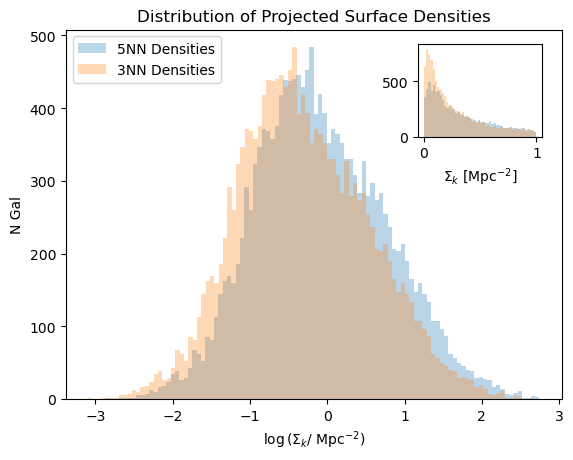

In [602]:
plt.figure()
fig,ax=plt.subplots()
im1 = ax.hist(np.log10(kNN_vals_5),bins=100,alpha=0.3,label='5NN Densities')
im2 = ax.hist(np.log10(kNN_vals_3),bins=100,alpha=0.3,label='3NN Densities')

ins = ax.inset_axes([0.71,0.71,0.25,0.25])
ins.hist(kNN_vals_5[kNN_vals_5<1.],bins=50,alpha=0.3)
ins.hist(kNN_vals_3[kNN_vals_3<1.],bins=50,alpha=0.3)

ins.set_xlabel(r'$\Sigma_k$ [Mpc$^{-2}$]')

plt.title(r'Distribution of Projected Surface Densities')
plt.xlabel(r'$\log$($\Sigma_k$/ Mpc$^{-2})$')
plt.ylabel('N Gal')
plt.legend(loc='upper left')

plt.show()

### Comparing k=5 values to Castignani+2022 -- VFS galaxies only

In [840]:
phot_r=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_r_photometry.fits')
M_r_flag = (phot_r['M_r']<=-15.7)
env=Table.read(homedir+'/Desktop/v2-20220820/vf_v2_environment.fits')[M_r_flag]
clus_flag = env['cluster_member']

In [935]:
%run kNN_local_density.py -vr_limit 500 -k 5 -vfs

-vr_limit [int in km/s; default is 500] -radius_limit [int in Mpc; default is 100 (no radius bounds)] -k [int; default is 5 (for fifth nearest neighbor)] -vfs [if included, will use VFS catalog and SGY bounds (from Castignani+22) in place of the vr_limit slice; otherwise, will default to WISESize catalog]
Using vr_limit = 500 km/s
Using radius_limit = 100 Mpc --> no limit!
Using k = 5
Applying absolute r-band magnitude completeness flag (M_r<=-15.7)...
Using SGY from VFS catalogs...
Number of Galaxies without kNN: 2
Execution Time: 0.4 minute(s)


In [936]:
vf_kNN = env['n5th_2D']   #5NN values for VFS galaxies from Gianluca's paper
my_kNN = all_kNN   #5NN values for VFS galaxies calculated using my algorithm

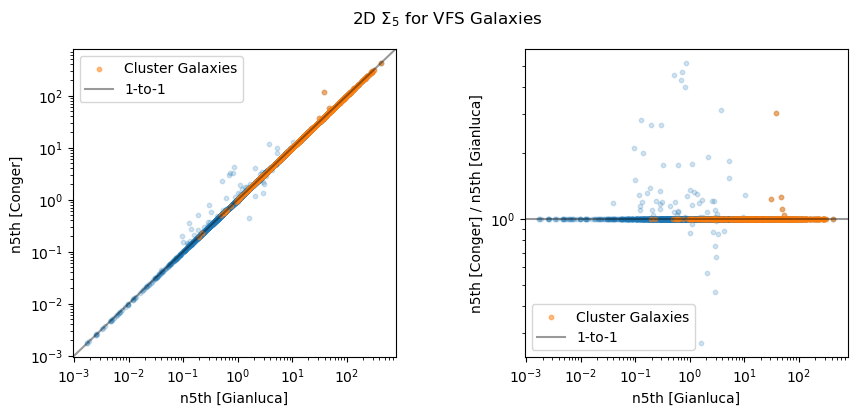

Mean ratio: 1.01 +/- 0.16
Median ratio: 1.00

Mean ratio: 1.01 +/- 0.17
Median ratio: 1.00

Fraction with ratio > 1.2: 0.01


In [937]:
plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace=0.4)
plt.subplot(1,2,1)
plt.scatter(vf_kNN,my_kNN,alpha=0.2,s=10)
plt.scatter(vf_kNN[clus_flag],my_kNN[clus_flag],alpha=0.5,s=10,label='Cluster Galaxies')
plt.axline([0,0],slope=1,color='black',alpha=0.4,label='1-to-1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n5th [Gianluca]')
plt.ylabel('n5th [Conger]')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(vf_kNN,my_kNN/vf_kNN,alpha=0.2,s=10)
plt.scatter(vf_kNN[clus_flag],my_kNN[clus_flag]/vf_kNN[clus_flag],alpha=0.5,s=10,label='Cluster Galaxies')
plt.axhline(1,color='black',alpha=0.4,label='1-to-1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('n5th [Gianluca]')
plt.ylabel('n5th [Conger] / n5th [Gianluca]')
plt.legend()

plt.suptitle(r'2D $\Sigma_{5}$ for VFS Galaxies')
plt.show()

print(f'Mean ratio: {np.mean(my_kNN/vf_kNN):.2f} +/- {np.std(my_kNN/vf_kNN):.2f}')
print(f'Median ratio: {np.median(my_kNN/vf_kNN):.2f}')
print()
print(f'Mean ratio: {np.mean(my_kNN[~clus_flag]/vf_kNN[~clus_flag]):.2f} +/- {np.std(my_kNN[~clus_flag]/vf_kNN[~clus_flag]):.2f}')
print(f'Median ratio: {np.median(my_kNN[~clus_flag]/vf_kNN[~clus_flag]):.2f}')
print()
print(f'Fraction with ratio > 1.2: {len((my_kNN/vf_kNN)[(my_kNN/vf_kNN)>1.2])/len(my_kNN):.2f}')

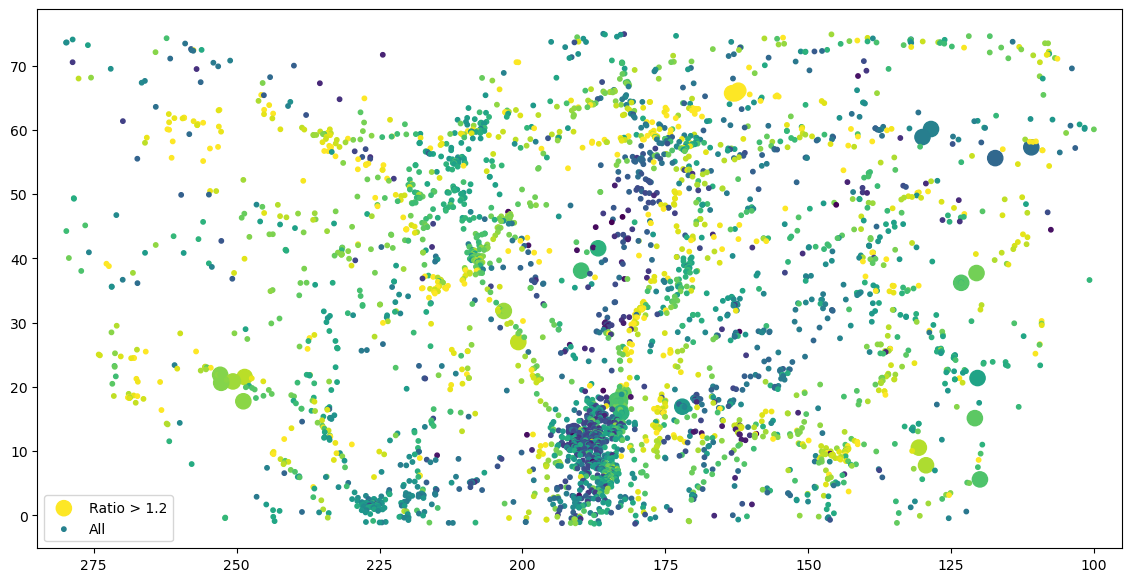

In [939]:
#outlier flag
outlier_flag = ((my_kNN/vf_kNN)>1.2)

plt.figure(figsize=(14,7))
plt.scatter(cat['RA'][outlier_flag],cat['DEC'][outlier_flag],s=120,alpha=1,c=env['Vcosmic'][outlier_flag],
           label='Ratio > 1.2',vmin=500,vmax=3500)
plt.scatter(cat['RA'],cat['DEC'],s=10,alpha=1,c=env['Vcosmic'],label='All',vmin=500,vmax=3500)
plt.xlim(np.max(cat['RA'])+5,np.min(cat['RA'])-5)
plt.legend()

In [891]:
# for VFS redshifts (for my algorithm), I converted Vcosmic using v=cz. 
# maybe I try using Vmodel instead -- doing now
# results of Vmodel: even more scatter. not the solution.

# another discrepancy -- Gianluca uses supergalactic coordinates
# "The 2D density is evaluated by including galaxies within a ΔSGY = 5.6 h^{−1} Mpc width, which 
# corresponds to the 2σ statistical uncertainty along the line of sight at the distance of Virgo."
# Using this, along with using SGX, SGZ for r_5, yields...
# marginally less scatter, but there is still some sort of systematic offset occurring.
# okay. could be the offset is due to the units of SGX, SGY, and SGZ in the catalog being Mpc/h. 
# I am now multiplying all SG coordinates by 0.74. this will hopefully help.
    # (lines 142-3, 226-8)
    # still a massive offset. WHY?!
# alright. the h is very likely not the problem - it follows the SGX, SGY, SGZ values into the 5NN value
# (which has units of h^2 / Mpc^2). I removed it from the calculations. 

In [907]:
# new day. new thoughts.
# possible other causes of discrepancy:
    # r-band absolute magnitude cut -- Gianluca applied one, I did not
        # M_r <= -15.7
    # Gianluca did not remove central galaxy from 5NN calculation, meaning that it was instead a 4NN calculation
        # changed [4] to [3] in line 166 !
    # perhaps the offset is, in fact, due to the h constant. units are reported as [(h^{-1} Mpc)^{-2}] 
    # in his code, even though SG coordinates are also h^{-1} and documentation says h^i/Mpc^2 as well as 
    # h^2^/Mpc^2^...

# YES. using [3] did, indeed, help a bit with a bulk of the lower-end scatter (e.g., where my values were much
# higher than Gianluca's...now, they are equivalent because dist[3] < dist[4])
# note that there are very few galaxies for which this change is nontrivial
# now applying M_r <= -15.7 flag
# even less scatter! Median ratio is 1.11. 

# pending additional suggestions, I am satisfied with this result.

In [909]:
# but alas, Greg is not satisfied. We now think that in addition to the M_r < -15.6 completeness cut, 
# Gianluca may have applied any further flags to the VFS before calculating n5_2D.
# Having fewer galaxies with which to calculate n5_2D could be a reason why his densities are 
# systematically lower than mine (indeed, for 45% of the galaxies the ratio of my densities to his is > 1.2).



In [910]:
#NEXT STEP. disregard Gianluca's VFS values. 
# instead -- create a mock catalog of galaxies with "known 5NN" density values.
# how to do so...
# make a "clumpy" spread of galaxies. x-y values will correspond to SG-XSGZ. or RA-DEC.
# (what about SGY? ignore for now, I suppose)
# (overlay a few "random" distributions of points, or "Gaussian distributions")
